In [1]:
import cobra
from cobra.io import read_sbml_model
from cobra import Model, Reaction, Metabolite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cobra.medium import minimal_medium
#from matplotlib_venn import venn2

In [2]:
pa74 = read_sbml_model('../models/Pediococcus_acidilactici_7_4.xml')
paDSM = read_sbml_model('../models/Pediococcus_acidilactici_DSM_20284.xml')

cobra.io.save_json_model(pa74, '../models/pa74.json')
cobra.io.save_json_model(paDSM, '../models/paDSM.json')

In [3]:
pa74.metabolites.query('arabinogal')

[]

Text(0.5, 1.0, 'Reactions')

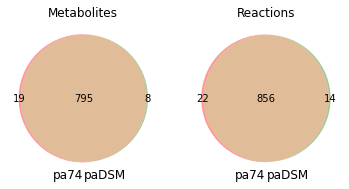

In [3]:
pa74_mets, paDSM_mets, pa74_rxns, paDSM_rxns = [],[],[],[]
for met in pa74.metabolites:
    pa74_mets.append(met.id)
for met in paDSM.metabolites:
    paDSM_mets.append(met.id)
for rxn in pa74.reactions:
    pa74_rxns.append(rxn.id)
for rxn in paDSM.reactions:
    paDSM_rxns.append(rxn.id)

fig, (ax1,ax2) = plt.subplots(1,2)
venn2(subsets=( set(pa74_mets),set(paDSM_mets)),set_labels=('pa74', 'paDSM'),ax = ax1)
venn2(subsets=(set(pa74_rxns),set(paDSM_rxns)),set_labels=('pa74', 'paDSM'),ax = ax2)
ax1.set_title('Metabolites')
ax2.set_title('Reactions')

In [4]:
DMEM = pd.read_csv('DMEM6429_medium.csv')
DMEM_medium = {}
for i in range(len(DMEM['rxn'])):
    if list(DMEM['rxn'])[i] not in ['EX_h2s(e)','EX_pydxn(e)', 'EX_mqn7(e)', 'EX_pheme(e)',
                                    'EX_sheme(e)','EX_arabinogal(e)','EX_mqn8(e)','EX_q8(e)']:
        DMEM_medium[list(DMEM['rxn'])[i]] = list(DMEM['flux'])[i]
print(DMEM_medium)

{'EX_ala_L(e)': 1.0, 'EX_arg_L(e)': 1.0, 'EX_asn_L(e)': 1.0, 'EX_asp_L(e)': 1.0, 'EX_cys_L(e)': 1.0, 'EX_gln_L(e)': 1.0, 'EX_glu_L(e)': 1.0, 'EX_gly(e)': 1.0, 'EX_his_L(e)': 1.0, 'EX_ile_L(e)': 1.0, 'EX_leu_L(e)': 1.0, 'EX_lys_L(e)': 1.0, 'EX_met_L(e)': 1.0, 'EX_phe_L(e)': 1.0, 'EX_pro_L(e)': 1.0, 'EX_ser_L(e)': 1.0, 'EX_thr_L(e)': 1.0, 'EX_trp_L(e)': 1.0, 'EX_tyr_L(e)': 1.0, 'EX_val_L(e)': 1.0, 'EX_glc_D(e)': 4.5, 'EX_pyr(e)': 1.0, 'EX_ca2(e)': 1.0, 'EX_chol(e)': 1.0, 'EX_cl(e)': 1.0, 'EX_cobalt2(e)': 1.0, 'EX_cu2(e)': 1.0, 'EX_fe2(e)': 1.0, 'EX_fe3(e)': 1.0, 'EX_fol(e)': 1.0, 'EX_k(e)': 1.0, 'EX_h2o(e)': 10.0, 'EX_inost(e)': 1.0, 'EX_mg2(e)': 1.0, 'EX_mn2(e)': 1.0, 'EX_ncam(e)': 1.0, 'EX_pi(e)': 10.0, 'EX_pnto_R(e)': 1.0, 'EX_ribflv(e)': 1.0, 'EX_so4(e)': 1.0, 'EX_thm(e)': 1.0, 'EX_zn2(e)': 1.0}


## add missing reactions and metabolites

In [5]:
ser_L_e = Metabolite('ser_L[e]',formula='C3H7NO3',name='L-Serine',compartment='e')
thr_L_e = Metabolite('thr_L[e]',formula='C4H9NO3',name='L-Threonine',compartment='e')
pyr_e = Metabolite('pyr[e]',formula='C3H3O3',name='Pyruvate',compartment='e')
inost_e = Metabolite('inost[e]',formula='C6H12O6',name='Myo-Inositol',compartment='e')
ncam_e = Metabolite('ncam[e]',formula='C6H6N2O',name='Nicotinamide',compartment='e')
# pa74: ser_L, thr_L, pyr, inost, ncam
SERt2r = Reaction(id='SERt2r',name='L-serine reversible transport via proton symport', subsystem='',
                  lower_bound=-1000.0, upper_bound=1000.0)
THRt2r = Reaction(id='THRt2r',name='L-threonine reversible transport via proton symport', subsystem='',
                  lower_bound=-1000.0, upper_bound=1000.0)
PYRt2 = Reaction(id='PYRt2',name='Pyruvate transport in via proton symport', subsystem='',
                 lower_bound=-1000.0, upper_bound=1000.0)
INOSt2 = Reaction(id='INOSt2',name='Myo-Inositol transport in via proton symport', subsystem='',
                 lower_bound=-1000.0, upper_bound=1000.0)
NCAMUP = Reaction(id='NCAMUP',name='Nicotinamide acid uptake', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)

EX_ser_L_e = Reaction(id='EX_ser_L(e)',name='EX_ser_L(e)', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
EX_thr_L_e = Reaction(id='EX_thr_L(e)',name='EX_thr_L(e)', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
EX_pyr_e = Reaction(id='EX_pyr(e)',name='EX_pyr(e)', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
EX_inost_e = Reaction(id='EX_inost(e)',name='EX_inost(e)', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
EX_ncam_e = Reaction(id='EX_ncam(e)',name='EX_ncam(e)', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
pa74.add_metabolites([ser_L_e,thr_L_e,pyr_e,inost_e,ncam_e])
pa74.add_reactions([SERt2r,THRt2r,PYRt2,INOSt2,NCAMUP,EX_ser_L_e,EX_thr_L_e,EX_pyr_e,EX_inost_e,EX_ncam_e])
SERt2r.build_reaction_from_string('h[e] + ser_L[e] <=> h[c] + ser_L[c]')
THRt2r.build_reaction_from_string('h[e] + thr_L[e] <=> h[c] + thr_L[c]')
PYRt2.build_reaction_from_string('h[e] + pyr[e] <=> h[c] + pyr[c]')
INOSt2.build_reaction_from_string('h[e] + inost[e] <=> h[c] + inost[c]')
NCAMUP.build_reaction_from_string('ncam[e] <=> ncam[c]')
EX_ser_L_e.build_reaction_from_string('ser_L[e] <=> ')
EX_thr_L_e.build_reaction_from_string('thr_L[e] <=> ')
EX_pyr_e.build_reaction_from_string('pyr[e] <=> ')
EX_inost_e.build_reaction_from_string('inost[e] <=> ')
EX_ncam_e.build_reaction_from_string('ncam[e] <=> ')
# paDSM: ser_L, pyr, inost, ncam

In [9]:
minimal_medium(pa74,min_objective_value=1,minimize_components=True)

EX_26dap_M(e)     0.092476
EX_alahis(e)      0.092623
EX_alaleu(e)      0.438660
EX_arg_L(e)       0.581914
EX_ca2(e)         0.007809
EX_cl(e)          0.007809
EX_cobalt2(e)     0.007809
EX_cu2(e)         0.007809
EX_cys_L(e)       0.104599
EX_fe2(e)         0.007809
EX_fe3(e)         0.007809
EX_for(e)         1.104929
EX_gln_L(e)       1.942411
EX_glyasp(e)      1.493891
EX_ile_L(e)       0.282550
EX_k(e)           0.007809
EX_lys_L(e)       0.333550
EX_mantr(e)      31.275120
EX_met_L(e)       0.157149
EX_mg2(e)         0.007809
EX_mn2(e)         0.007809
EX_phe_L(e)       0.180560
EX_pi(e)          1.170679
EX_pnto_R(e)      0.015619
EX_pro_L(e)       0.215430
EX_pydx(e)        0.007809
EX_ribflv(e)      0.015619
EX_so4(e)         0.007809
EX_trp_L(e)       0.055157
EX_tyr_L(e)       0.134250
EX_val_L(e)       0.411600
EX_zn2(e)         0.007809
EX_ncam(e)        0.015619
dtype: float64

In [12]:
with pa74:
    temp_medium = DMEM_medium.copy()
    temp_medium['EX_mantr(e)'] = 30
    temp_medium['EX_for(e)'] = 1
    temp_medium['EX_glyasp(e)'] = 1
    temp_medium['EX_alaleu(e)'] = 1
    temp_medium['EX_alahis(e)'] = 1
    temp_medium['EX_26dap_M(e)'] = 1
    pa74.medium = temp_medium
    print(pa74.medium)
    print(pa74.slim_optimize())

{'EX_26dap_M(e)': 1, 'EX_ala_L(e)': 1.0, 'EX_alahis(e)': 1, 'EX_alaleu(e)': 1, 'EX_arg_L(e)': 1.0, 'EX_asn_L(e)': 1.0, 'EX_asp_L(e)': 1.0, 'EX_ca2(e)': 1.0, 'EX_chol(e)': 1.0, 'EX_cl(e)': 1.0, 'EX_cobalt2(e)': 1.0, 'EX_cu2(e)': 1.0, 'EX_cys_L(e)': 1.0, 'EX_fe2(e)': 1.0, 'EX_fe3(e)': 1.0, 'EX_fol(e)': 1.0, 'EX_for(e)': 1, 'EX_glc_D(e)': 4.5, 'EX_gln_L(e)': 1.0, 'EX_glu_L(e)': 1.0, 'EX_gly(e)': 1.0, 'EX_glyasp(e)': 1, 'EX_h2o(e)': 10.0, 'EX_his_L(e)': 1.0, 'EX_ile_L(e)': 1.0, 'EX_k(e)': 1.0, 'EX_leu_L(e)': 1.0, 'EX_lys_L(e)': 1.0, 'EX_mantr(e)': 30, 'EX_met_L(e)': 1.0, 'EX_mg2(e)': 1.0, 'EX_mn2(e)': 1.0, 'EX_phe_L(e)': 1.0, 'EX_pi(e)': 10.0, 'EX_pnto_R(e)': 1.0, 'EX_pro_L(e)': 1.0, 'EX_ribflv(e)': 1.0, 'EX_so4(e)': 1.0, 'EX_thm(e)': 1.0, 'EX_trp_L(e)': 1.0, 'EX_tyr_L(e)': 1.0, 'EX_val_L(e)': 1.0, 'EX_zn2(e)': 1.0, 'EX_ser_L(e)': 1.0, 'EX_thr_L(e)': 1.0, 'EX_pyr(e)': 1.0, 'EX_inost(e)': 1.0, 'EX_ncam(e)': 1.0}
0.0


## PedA synthesis

'H-Lys-Tyr-Tyr-Gly-Asn-Gly-Val-Thr-Cys(1)-Gly-Lys-His-Ser-Cys(1)-Ser-Val-Asp-Trp-Gly-Lys-Ala-Thr-Thr-Cys(2)-Ile-Ile-Asn-Asn-Gly-Ala-Met-Ala-Trp-Ala-Thr-Gly-Gly-His-Gln-Gly-Asn-His-Lys-Cys(2)-OH'

https://pubchem.ncbi.nlm.nih.gov/compound/Pediocin-PA-1#section=Biologic-Description


In [ ]:
# pediocin PA-1
aa_freq = {}
pedA_seq = 'KYYGNGVTCGKHSCSVDWGKATTCIINNGAMAWATGGHQGNHKC'
for a in pedA_seq:
    if a in aa_freq:
        aa_freq[a] += 1
    else:
        aa_freq[a] = 1
print(aa_freq)
    
atp_num = len(pedA_seq)*4.306
print(atp_num)

In [ ]:
aa_names = {'A':'ala_L[c]', 'C':'cys_L[c]', 'D':'asp_L[c]', 'E':'glu_L[c]', 'F':'phe_L[c]', 'G':'gly[c]',
            'H':'his_L[c]', 'I':'ile_L[c]', 'K':'lys_L[c]', 'L':'leu_L[c]', 'M':'met_L[c]', 'N':'asn_L[c]',
            'P':'pro_L[c]','Q':'gln_L[c]', 'R':'arg_L[c]', 'S':'ser_L[c]', 'T':'thr_L[c]', 'V':'val_L[c]',
            'W':'trp_L[c]', 'Y':'tyr_L[c]'}

pedA_c = Metabolite('pedA[c]',formula='C196H293N61O60S5',name='Pediocin PA-1',compartment='c')
pedA_e = Metabolite('pedA[e]',formula='C196H293N61O60S5',name='Pediocin PA-1',compartment='e')
pa74.add_metabolites([pedA_c,pedA_e])
#pediocin synthesis
PedA_synthesis = Reaction('PedA_synthesis')
PedA_synthesis.name = 'Pediocin PA-1 synthesis'
PedA_synthesis.subsystem = ''
PedA_synthesis.lower_bound = 0
PedA_synthesis.upper_bound = 1000.
PedA_synthesis.gene_reaction_rule = ''
PedA_synthesis_rxn = ''
for aa in aa_freq:
    PedA_synthesis_rxn = PedA_synthesis_rxn + str(float(aa_freq[aa])) + ' ' + aa_names[aa] + ' + '
PedA_synthesis_rxn =(  PedA_synthesis_rxn + 
    '189.464 atp[c] + 146.464 h2o[c] --> 189.464 adp[c] + 189.464 pi[c] + pedA[c] + 189.464 h[c]' )
    
print(PedA_synthesis_rxn)
#pediocin export: c->e and exchange
PedAabc = Reaction('PedAabc')
PedAabc.name = 'Pediocin PA-1 export via ABC system'
PedAabc.subsystem = ''
PedAabc.lower_bound = 0
PedAabc.upper_bound = 1000.
PedAabc.gene_reaction_rule = ''
PedAabc_rxn = 'pedA[c] + atp[c] + h2o[c] --> pedA[e] + adp[c] + pi[c] + h[c] '
EX_pedA_e = Reaction('EX_pedA_e')
EX_pedA_e.name = 'R_EX_pedA_e'
EX_pedA_e.subsystem = ''
EX_pedA_e.lower_bound = -1000.
EX_pedA_e.upper_bound = 1000.
EX_pedA_e.gene_reaction_rule = ''
EX_pedA_e_rxn = 'pedA[e] <=> '
pa74.add_reactions([PedA_synthesis,PedAabc,EX_pedA_e])
PedA_synthesis.build_reaction_from_string(PedA_synthesis_rxn)
PedAabc.build_reaction_from_string(PedAabc_rxn)
EX_pedA_e.build_reaction_from_string(EX_pedA_e_rxn)